In [1]:
%matplotlib inline
import networkx as nx
import gzip
import matplotlib.pyplot as plt
G = nx.read_graphml('openflights_world.graphml.gz')


Un modo per pensare allimportanza dei nodi in una rete è quello di misurare quanto la loro rimozione danneggerebbe la struttura della rete 

Consideriamo due tipi di danno alla rete: 
- guasto casuale -> i nodi vengono scelti a caso per essere rimossi 
- attacco mirato -> si rimuovono i nodi in base a un criterio, ad esempio rimuovendo i nodi in ordine decrescente rispetto alla loro centralità di grado.

Per misurare il "danno", si misurerà la dimensione della componente connessa più grande della rete, a volte chiamata "core"

In [2]:
nx.connected_components(G) # ritorna tutte le componenti connesse (sappiamo già essere 7, una delle quali decisamente più grande delle altre)
core = next(nx.connected_components(G)) # con next ricavo il primo elemento del generatore, che sarà la componente connessa più grande
print(len(core))

3154


### Fallimento randomico

Innanzitutto bisogna creare una copia della rete

In [3]:
import random
G_copy= G.copy()

Per simulare un fallimento casuale scelgo casualmente alcuni nodi e li rimuovo dal grafo

La simulazione completa sarà:
- Misuro la dimensione del core rispetto alla rete originale
- Seleziono M nodi random e li rimuovo
- Ripeto finchè la rete non ha meno di M nodi

In [4]:
M = 20
num_nodes_removed = range(0, G.number_of_nodes(), M)

range(valore_inizio, valore_arresto, dimensione_passo): Genera la sequenza incrementando il valore iniziale utilizzando la dimensione del passo fino a raggiungere il valore di stop.

In [5]:
N = G.number_of_nodes()
G_copy = G.copy()
random_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    core = next(nx.connected_components(G_copy))
    core_proportion = len(core) / N
    random_attack_core_proportions.append(core_proportion)
    if G_copy.number_of_nodes() > M:
        nodes_to_remove = random.sample(list(G_copy.nodes), M)
        G_copy.remove_nodes_from(nodes_to_remove)  

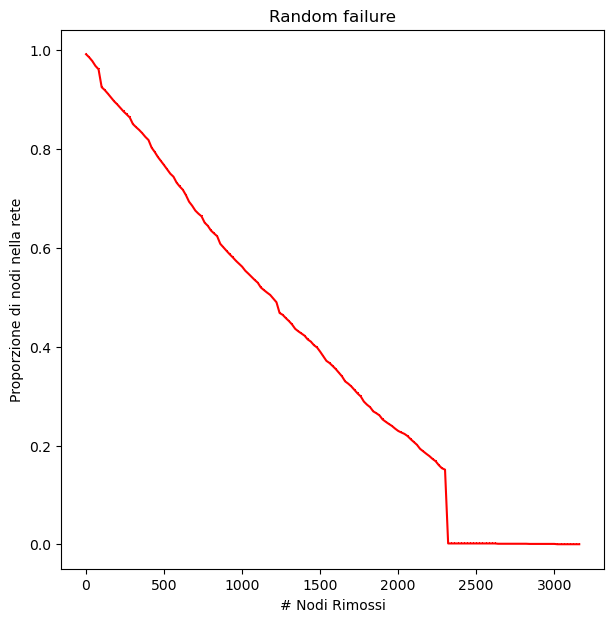

In [6]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('Random failure')
plt.xlabel('# Nodi Rimossi')
plt.ylabel('Proporzione di nodi nella rete')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker=',', color="red")

### Attacco mirato

La simulazione di un attacco mirato è simile, tranne per il fatto che invece di scegliere in modo casuale, selezioneremo gli M nodi più centrali a ogni passo. 
Per fare ciò l'idea è di utilizzare qualcosa di simile alla funzione max utilizzata in precedenza per ottenere il nodo più centrale, ma in grado di ottenere i primi M nodi più centrali

Quindi ad ogni passo sarà importante ordinare i nodi per grado e rimuovere i primi M

In [7]:
# esempio di funzionamento
G_copy = G.copy()
M = 10
nodes_sorted_by_degree = sorted(G_copy.nodes, key=G.degree, reverse=True)
top_degree_nodes = nodes_sorted_by_degree[:M]
top_degree_nodes

['AMS', 'FRA', 'CDG', 'IST', 'ATL', 'ORD', 'PEK', 'MUC', 'DFW', 'DME']

In [25]:
N = G.number_of_nodes()
number_of_steps = 150
M = N // number_of_steps  #Questo operatore divide il primo argomento per il secondo e arrotonda il risultato al numero intero più vicino
print(M)
num_nodes_removed_atk = range(0, N, M)
G_copy = G.copy()
targeted_attack_core_proportions = []
for nodes_removed in num_nodes_removed_atk:
    # Measure the relative size of the network core
    core = next(nx.connected_components(G_copy))
    core_proportion = len(core) / N
    targeted_attack_core_proportions.append(core_proportion)
    
    # If there are more than M nodes, select top M nodes and remove them
    if G_copy.number_of_nodes() > M:
        nodes_sorted_by_degree = sorted(G_copy.nodes, key=G_copy.degree, reverse=True)
        nodes_to_remove = nodes_sorted_by_degree[:M]
        G_copy.remove_nodes_from(nodes_to_remove)

21


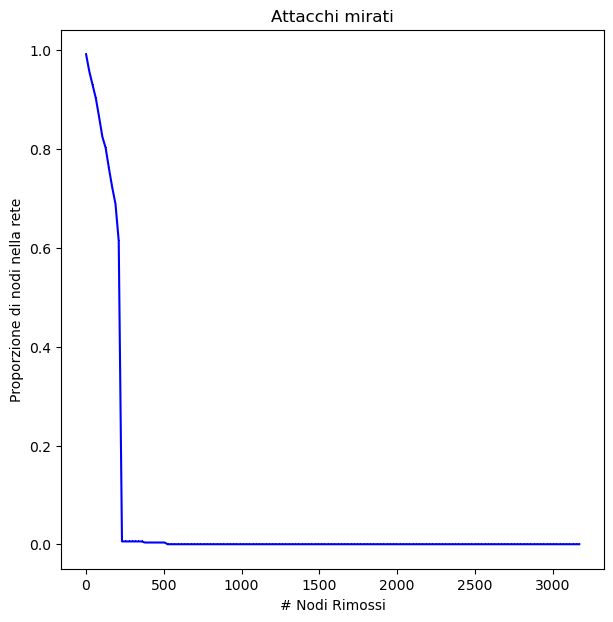

In [26]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('Attacchi mirati')
plt.xlabel('# Nodi Rimossi')
plt.ylabel('Proporzione di nodi nella rete')
plt.plot(num_nodes_removed_atk, targeted_attack_core_proportions, marker=',', color="blue")

### Plot delle differenze

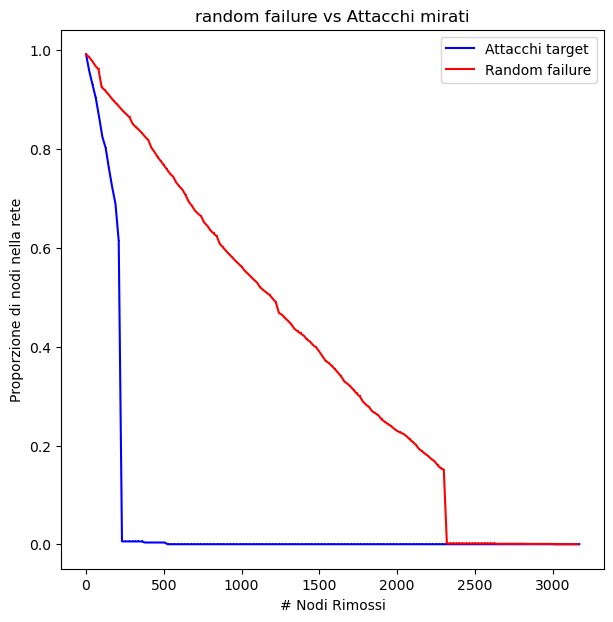

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('random failure vs Attacchi mirati')
plt.xlabel('# Nodi Rimossi')
plt.ylabel('Proporzione di nodi nella rete')
plt.plot(num_nodes_removed_atk, targeted_attack_core_proportions, marker=',', color="blue", label="Attacchi target")
plt.plot(num_nodes_removed, random_attack_core_proportions, marker=',', color="red", label="Random failure")
plt.legend()

# Attacchi mirati alla betweenness

In [ ]:
sorted(G_copy.nodes, key=nx.betweenness_centrality(G_copy).get, reverse=True)

In [21]:
N = G.number_of_nodes()
number_of_steps = 150
M = N // number_of_steps  #Questo operatore divide il primo argomento per il secondo e arrotonda il risultato al numero intero più vicino

num_nodes_removed_atk_bet = range(0, N, M)
G_copy = G.copy()
targeted_attack_core_proportions_bet = []
for nodes_removed in num_nodes_removed_atk_bet:
    print(G_copy.number_of_nodes())
    # Measure the relative size of the network core
    core = next(nx.connected_components(G_copy))
    core_proportion = len(core) / N
    targeted_attack_core_proportions_bet.append(core_proportion)
    
    # If there are more than M nodes, select top M nodes and remove them
    if G_copy.number_of_nodes() > M:
        nodes_sorted_by_degree = sorted(G_copy.nodes, key=nx.betweenness_centrality(G_copy).get, reverse=True) #ordino in base alla betweenness
        nodes_to_remove = nodes_sorted_by_degree[:M]
        G_copy.remove_nodes_from(nodes_to_remove)

3179
3158
3137
3116
3095
3074
3053
3032
3011
2990
2969
2948
2927
2906
2885
2864
2843
2822
2801
2780
2759
2738
2717
2696
2675
2654
2633
2612
2591
2570
2549
2528
2507
2486
2465
2444
2423
2402
2381
2360
2339
2318
2297
2276
2255
2234
2213
2192
2171
2150
2129
2108
2087
2066
2045
2024
2003
1982
1961
1940
1919
1898
1877
1856
1835
1814
1793
1772
1751
1730
1709
1688
1667
1646
1625
1604
1583
1562
1541
1520
1499
1478
1457
1436
1415
1394
1373
1352
1331
1310
1289
1268
1247
1226
1205
1184
1163
1142
1121
1100
1079
1058
1037
1016
995
974
953
932
911
890
869
848
827
806
785
764
743
722
701
680
659
638
617
596
575
554
533
512
491
470
449
428
407
386
365
344
323
302
281
260
239
218
197
176
155
134
113
92
71
50
29
8


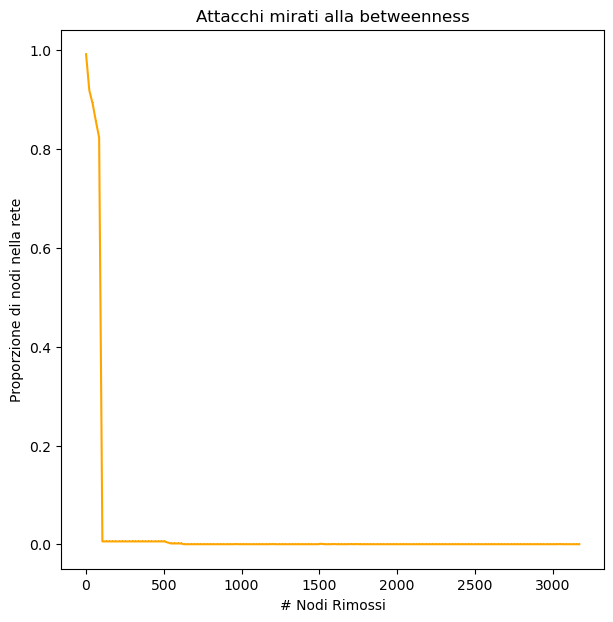

In [22]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('Attacchi mirati alla betweenness')
plt.xlabel('# Nodi Rimossi')
plt.ylabel('Proporzione di nodi nella rete')
plt.plot(num_nodes_removed_atk_bet, targeted_attack_core_proportions_bet, marker=',', color="orange")

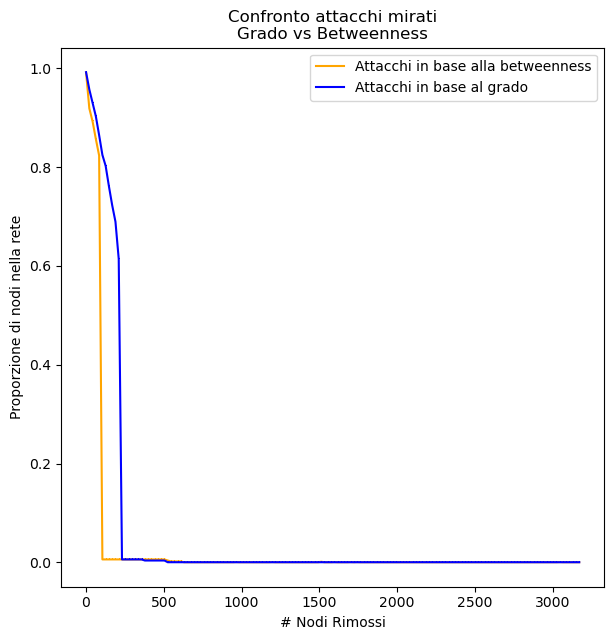

In [29]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('Confronto attacchi mirati\nGrado vs Betweenness')
plt.xlabel('# Nodi Rimossi')
plt.ylabel('Proporzione di nodi nella rete')
plt.plot(num_nodes_removed_atk_bet, targeted_attack_core_proportions_bet, marker=',', color="orange", label="Attacchi in base alla betweenness")
plt.plot(num_nodes_removed_atk, targeted_attack_core_proportions, marker=',', color="blue", label="Attacchi in base al grado")
plt.legend()

In [30]:
N = G.number_of_nodes()
number_of_steps = 150
M = N // number_of_steps  #Questo operatore divide il primo argomento per il secondo e arrotonda il risultato al numero intero più vicino

num_nodes_removed_atk_cls = range(0, N, M)
G_copy = G.copy()
targeted_attack_core_proportions_cls = []
for nodes_removed in num_nodes_removed_atk_cls:
    print(G_copy.number_of_nodes())
    # Measure the relative size of the network core
    core = next(nx.connected_components(G_copy))
    core_proportion = len(core) / N
    targeted_attack_core_proportions_cls.append(core_proportion)
    
    # If there are more than M nodes, select top M nodes and remove them
    if G_copy.number_of_nodes() > M:
        nodes_sorted_by_degree = sorted(G_copy.nodes, key=nx.closeness_centrality(G_copy).get, reverse=True) #ordino in base alla closeness
        nodes_to_remove = nodes_sorted_by_degree[:M]
        G_copy.remove_nodes_from(nodes_to_remove)

3179
3158
3137
3116
3095
3074
3053
3032
3011
2990
2969
2948
2927
2906
2885
2864
2843
2822
2801
2780
2759
2738
2717
2696
2675
2654
2633
2612
2591
2570
2549
2528
2507
2486
2465
2444
2423
2402
2381
2360
2339
2318
2297
2276
2255
2234
2213
2192
2171
2150
2129
2108
2087
2066
2045
2024
2003
1982
1961
1940
1919
1898
1877
1856
1835
1814
1793
1772
1751
1730
1709
1688
1667
1646
1625
1604
1583
1562
1541
1520
1499
1478
1457
1436
1415
1394
1373
1352
1331
1310
1289
1268
1247
1226
1205
1184
1163
1142
1121
1100
1079
1058
1037
1016
995
974
953
932
911
890
869
848
827
806
785
764
743
722
701
680
659
638
617
596
575
554
533
512
491
470
449
428
407
386
365
344
323
302
281
260
239
218
197
176
155
134
113
92
71
50
29
8


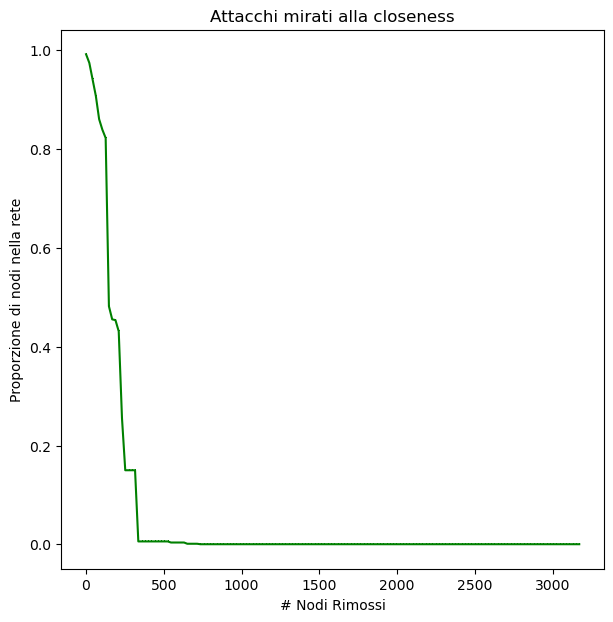

In [32]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('Attacchi mirati alla closeness')
plt.xlabel('# Nodi Rimossi')
plt.ylabel('Proporzione di nodi nella rete')
plt.plot(num_nodes_removed_atk_cls, targeted_attack_core_proportions_cls, marker=',', color="green")

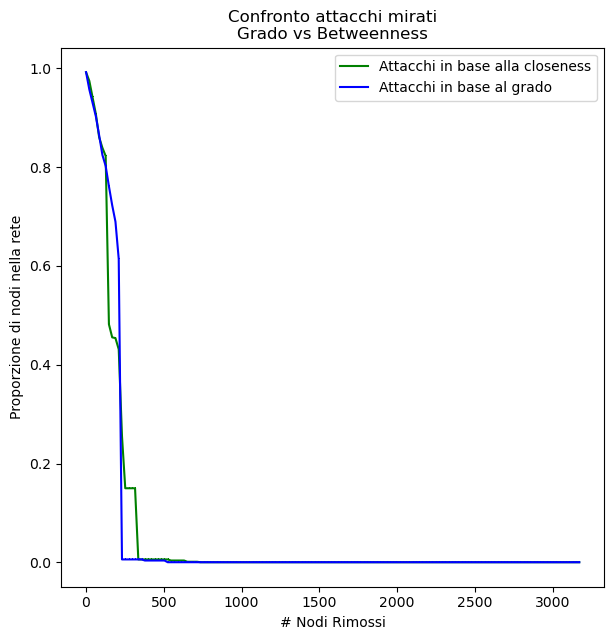

In [34]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('Confronto attacchi mirati\nGrado vs Betweenness')
plt.xlabel('# Nodi Rimossi')
plt.ylabel('Proporzione di nodi nella rete')
plt.plot(num_nodes_removed_atk_cls, targeted_attack_core_proportions_cls, marker=',', color="green", label="Attacchi in base alla closeness")
plt.plot(num_nodes_removed_atk, targeted_attack_core_proportions, marker=',', color="blue", label="Attacchi in base al grado")
plt.legend()

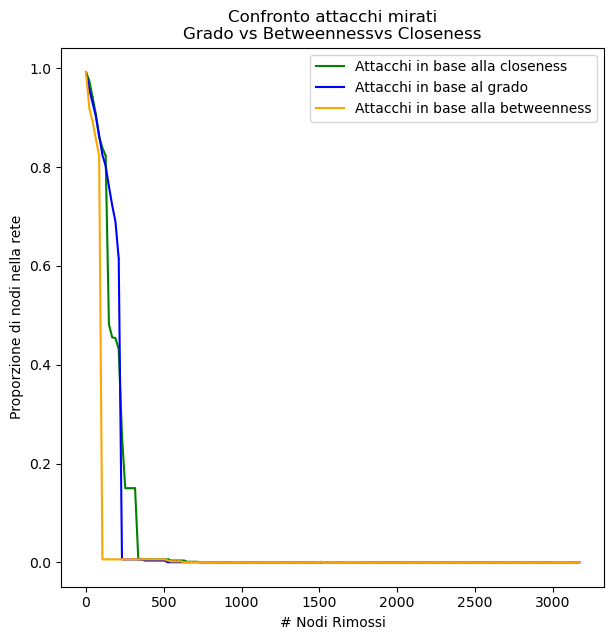

In [36]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.title('Confronto attacchi mirati\nGrado vs Betweennessvs Closeness')
plt.xlabel('# Nodi Rimossi')
plt.ylabel('Proporzione di nodi nella rete')
plt.plot(num_nodes_removed_atk_cls, targeted_attack_core_proportions_cls, marker=',', color="green", label="Attacchi in base alla closeness")
plt.plot(num_nodes_removed_atk, targeted_attack_core_proportions, marker=',', color="blue", label="Attacchi in base al grado")
plt.plot(num_nodes_removed_atk_bet, targeted_attack_core_proportions_bet, marker=',', color="orange", label="Attacchi in base alla betweenness")
plt.legend()